<a href="https://colab.research.google.com/github/moaaz12-web/Image-recognition-using-RESNET50-and-ALEXNET/blob/main/Flower_classification_using_RESNET50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT DATA

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# DOWNLOAD DATA

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [ ]:
print(data_dir)

/root/.keras/datasets/flower_photos


/root/.keras/datasets/flower_photos/roses/4558025386_2c47314528.jpg


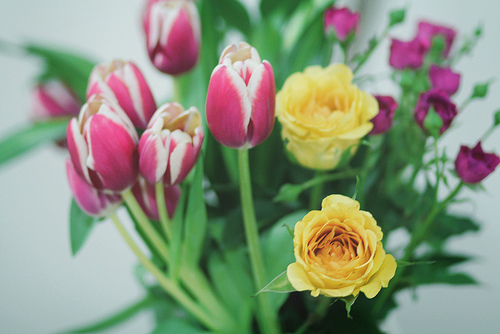

In [ ]:
roses = list(data_dir.glob('roses/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Assuming you have defined these variables
img_height, img_width = 180, 180
batch_size = 32


# Load the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

train_steps_per_epoch = len(train_ds)
val_steps_per_epoch = len(val_ds)
# Obtain class labels by iterating through the dataset
class_names = train_ds.class_names
print("Class names:", class_names)

# Assuming train_ds is your training dataset
train_labels = np.array([])

for images, labels in train_ds:
    train_labels = np.concatenate([train_labels, labels.numpy()])

val_labels = np.array([])

for images, labels in val_ds:
    val_labels = np.concatenate([val_labels, labels.numpy()])

# Convert to integers
train_labels = train_labels.astype(int)
val_labels = val_labels.astype(int)

# Build the model
resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(img_height, img_width, 3),
    pooling='avg',
    classes=len(class_names),  # Number of output classes
    weights='imagenet'
)

for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(len(class_names), activation='softmax'))

# Use sparse_categorical_crossentropy for integer-encoded labels
resnet_model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10

history = resnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    steps_per_epoch=train_steps_per_epoch,
    validation_steps=val_steps_per_epoch,
    verbose=1
)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
Class names: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
94765736/94765736 [==============================] - 0s 0us/step


Epoch 1/10
92/92 [==============================] - 21s 151ms/step - loss: 0.8229 - accuracy: 0.7745 - val_loss: 0.3740 - val_accuracy: 0.8597
Epoch 2/10
92/92 [==============================] - 8s 85ms/step - loss: 0.2770 - accuracy: 0.9053 - val_loss: 0.3678 - val_accuracy: 0.8624
Epoch 3/10
92/92 [==============================] - 9s 89ms/step - loss: 0.1683 - accuracy: 0.9418 - val_loss: 0.5609 - val_accuracy: 0.8202
Epoch 4/10
92/92 [==============================] - 9s 95ms/step - loss: 0.1146 - accuracy: 0.9615 - val_loss: 0.3683 - val_accuracy: 0.8733
Epoch 5/10
92/92 [==============================] - 9s 93ms/step - loss: 0.0662 - accuracy: 0.9826 - val_loss: 0.4207 - val_accuracy: 0.8719
Epoch 6/10
92/92 [==============================] - 8s 86ms/step - loss: 0.0399 - accuracy: 0.9905 - val_loss: 0.3978 - val_accuracy: 0.8747
Epoch 7/10
92/92 [==============================] - 9s 95ms/step - loss: 0.0213 - accuracy: 0.9980 - val_loss: 0.4146 - val_accuracy: 0.8774
Epoch 8/10


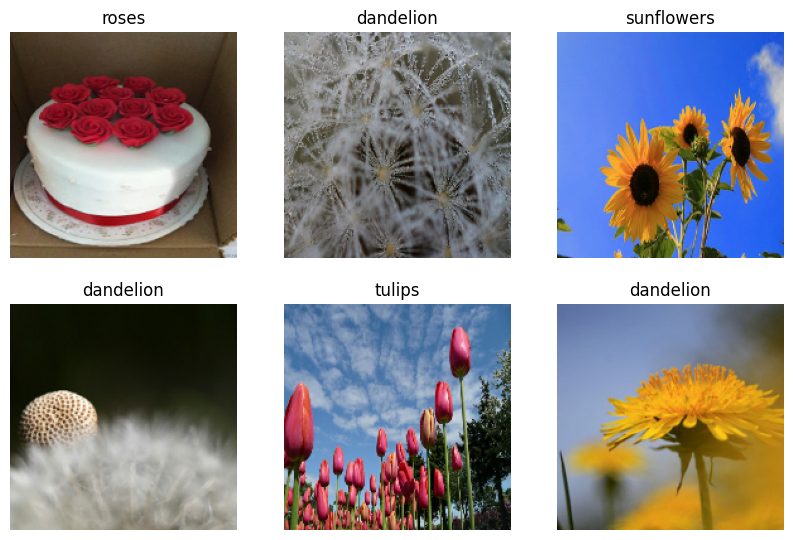

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")



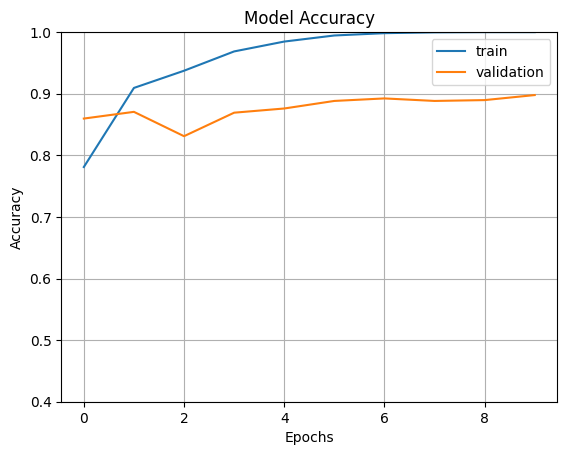

In [ ]:

fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

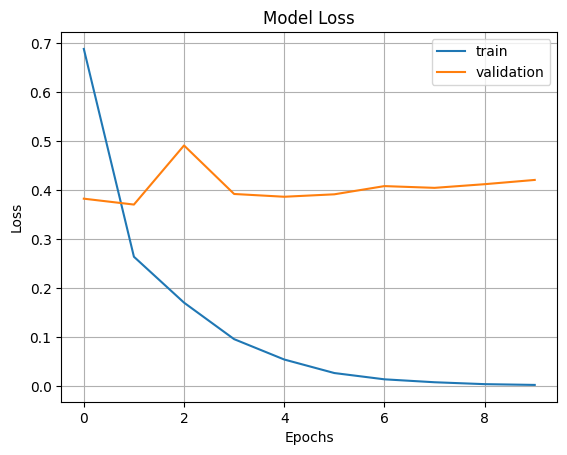

In [ ]:


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
class_names = train_ds.class_names
print(class_names)


['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


Dandelion image link: https://images.app.goo.gl/b88pv7ieVMZZK3Kt7

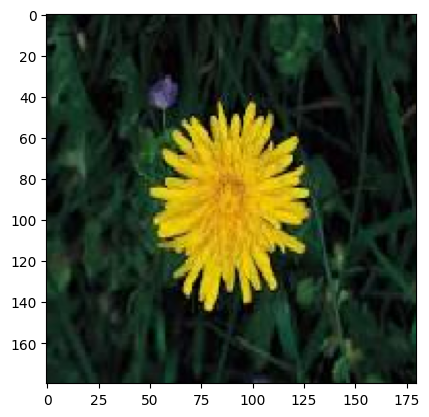

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

# Load an input image
image_path = '/content/dd.jpg'
img = image.load_img(image_path, target_size=(180, 180))

plt.imshow(img);

In [ ]:
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
predictions = resnet_model.predict(img_array)

# Get the index with the highest probability
predicted_class_index = np.argmax(predictions[0])

# Get the corresponding class label
predicted_class_label = class_names[predicted_class_index]

print("Predicted class:", predicted_class_label)

1/1 [==============================] - 0s 43ms/step
Predicted class: dandelion
